In [24]:
# !pip install mlxtend

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules,apriori
from mlxtend.preprocessing import TransactionEncoder

In [3]:
df = pd.read_csv('store_data.csv',header=None)
df.shape

(7501, 20)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='0'>

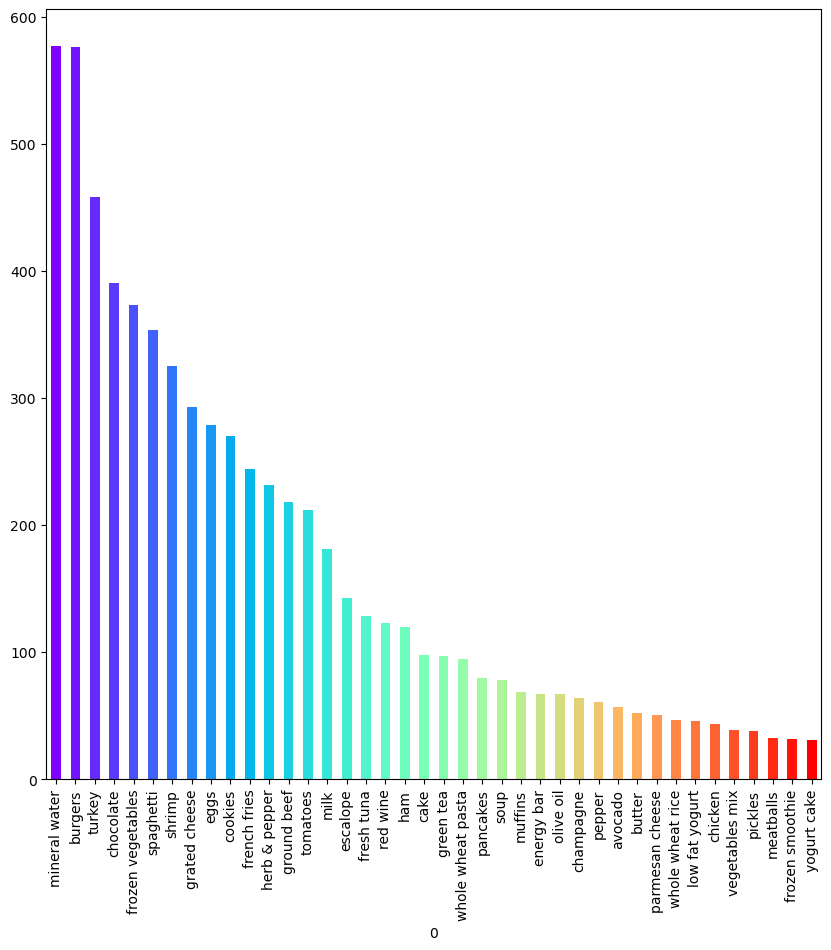

In [25]:
plt.figure(figsize=(10,10))
color=plt.cm.rainbow(np.linspace(0,1,40))
df[0].value_counts().head(40).plot(kind='bar',color=color)

In [6]:
transaction = []

In [7]:
for i in range(len(df)):
    transaction.append([str(df.values[i,j]) for j in df.columns])

In [8]:
transaction[0]

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil']

In [9]:
item1 = [items for trans in transaction for items in trans]

In [10]:
item2 = list(set(item1))
print(item2)

['chili', 'yogurt cake', 'cake', 'sparkling water', 'strawberries', 'shallot', 'soup', 'champagne', 'body spray', 'whole wheat rice', ' asparagus', 'frozen vegetables', 'mushroom cream sauce', 'chutney', 'french wine', 'cider', 'frozen smoothie', 'red wine', 'honey', 'fresh tuna', 'herb & pepper', 'escalope', 'ketchup', 'pepper', 'toothpaste', 'light cream', 'oil', 'cream', 'fresh bread', 'whole weat flour', 'pancakes', 'olive oil', 'spaghetti', 'black tea', 'brownies', 'grated cheese', 'salt', 'extra dark chocolate', 'eggplant', 'napkins', 'yams', 'fromage blanc', 'vegetables mix', 'burgers', 'shrimp', 'soda', 'energy bar', 'parmesan cheese', 'turkey', 'magazines', 'mint green tea', 'low fat yogurt', 'pet food', 'strong cheese', 'ham', 'corn', 'mineral water', 'white wine', 'mint', 'cooking oil', 'gums', 'mayonnaise', 'barbecue sauce', 'blueberries', 'sandwich', 'babies food', 'oatmeal', 'tomato juice', 'water spray', 'light mayo', 'dessert wine', 'ground beef', 'meatballs', 'pickles'

In [11]:
len(item2)

121

In [12]:
if 'nan' in item2:
    item2.remove('nan')

In [13]:
len(item2)

120

In [14]:
enc = TransactionEncoder().fit(transaction)

In [15]:
one_hot = enc.transform(transaction)

In [16]:
one_hot

array([[False,  True,  True, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [17]:
data = pd.DataFrame(one_hot,columns=enc.columns_).drop('nan',axis=1)

In [18]:
data

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
freq_pattern = apriori(data,min_support=0.01,use_colnames=True)
freq_pattern

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(mineral water, milk, ground beef)"
253,0.017064,"(mineral water, spaghetti, ground beef)"
254,0.015731,"(mineral water, spaghetti, milk)"
255,0.010265,"(mineral water, spaghetti, olive oil)"


In [20]:
association_rules(freq_pattern,min_threshold=0.01,metric='confidence')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,1.0,0.003654,1.168147,0.325896,0.044593,0.143943,0.198329
1,(mineral water),(avocado),0.238368,0.033329,0.011598,0.048658,1.459926,1.0,0.003654,1.016113,0.413630,0.044593,0.015857,0.198329
2,(burgers),(cake),0.087188,0.081056,0.011465,0.131498,1.622319,1.0,0.004398,1.058080,0.420238,0.073129,0.054892,0.136473
3,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,1.0,0.004398,1.063198,0.417434,0.073129,0.059442,0.136473
4,(burgers),(chocolate),0.087188,0.163845,0.017064,0.195719,1.194537,1.0,0.002779,1.039630,0.178411,0.072934,0.038120,0.149934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,"(pancakes, spaghetti)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,1.0,0.005459,1.397557,0.488452,0.045479,0.284466,0.251562
428,"(mineral water, spaghetti)",(pancakes),0.059725,0.095054,0.011465,0.191964,2.019529,1.0,0.005788,1.119933,0.536902,0.080000,0.107090,0.156291
429,(pancakes),"(mineral water, spaghetti)",0.095054,0.059725,0.011465,0.120617,2.019529,1.0,0.005788,1.069244,0.557862,0.080000,0.064760,0.156291
430,(mineral water),"(pancakes, spaghetti)",0.238368,0.025197,0.011465,0.048098,1.908923,1.0,0.005459,1.024059,0.625163,0.045479,0.023494,0.251562


In [26]:
df[data['mineral water']==True].shape

(1788, 20)

In [34]:
df[data['pancakes']==True].sha pe

(713, 20)

In [23]:
1788/7501

0.23836821757099053

In [35]:
713/7501

0.09505399280095987